# Intro to Regression with Neural Networks in Tensorflow

There are many defintions for a regression problem but in our case, we are going to simpltfiy it. predicting a number with some other numbers

In [ ]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.4.1


## Create data to view and fit

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features (Input)
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
# Create labels (Output)
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0,21.0,24.0])

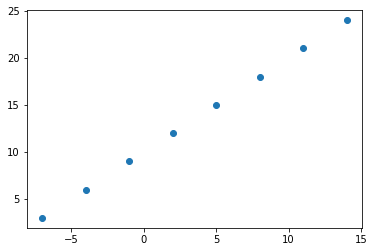

In [ ]:
# Visualize
plt.scatter(X,y)

In [ ]:
all(y == X + 10)

True

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
X + 10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

## Input and output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom','bathroom','garage'])
house_price = tf.constant([939700])

In [ ]:
house_info

<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>

In [ ]:
house_price

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>

In [ ]:
X[0],y[0]

(-7.0, 3.0)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape

In [ ]:
input_shape

()

In [ ]:
output_shape

()

In [ ]:
X[0].ndim

0

In [ ]:
X[0],y[0]

(-7.0, 3.0)

In [ ]:
# Turn our Numpy arrays to tensors
X = tf.cast(tf.constant(X),tf.float16)
y = tf.cast(tf.constant(y),tf.float16)

In [ ]:
X

<tf.Tensor: shape=(8,), dtype=float16, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float16)>

In [ ]:
y

<tf.Tensor: shape=(8,), dtype=float16, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float16)>

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape

In [ ]:
input_shape

TensorShape([])

In [ ]:
output_shape

TensorShape([])

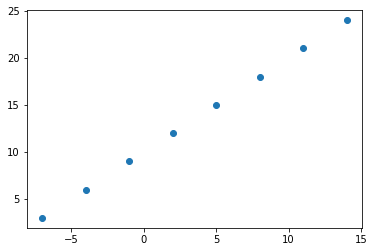

In [ ]:
plt.scatter(X,y)

## Steps in modeling with tensorflow

1. Creating a model - define the input and output layers, as well as the hidden layers also.
2. Compiling a model - define the loss funtion (in other words, the funtion which tells our model how wrong it is)
3. Fitting a model - letting the model find patter between X and y or Input and Output

In [ ]:
tf.random.set_seed(42)
# Create a model using Squential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])
# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), # or Adam()
              metrics=['accuracy']
              )
# MAE = how average the model is wrong (lower the better)
model.fit(X,y,epochs=5) # 50 is the best
# Epoch = Lap

Epoch 1/5
1/1 [==============================] - 1s 523ms/step - loss: 11.5048 - accuracy: 0.0000e+00
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 11.3723 - accuracy: 0.0000e+00
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 11.2398 - accuracy: 0.0000e+00
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 11.1073 - accuracy: 0.0000e+00
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 10.9748 - accuracy: 0.0000e+00


In [ ]:
X

<tf.Tensor: shape=(8,), dtype=float16, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float16)>

In [ ]:
y

<tf.Tensor: shape=(8,), dtype=float16, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float16)>

In [ ]:
y_pred = model.predict([17.0])

In [ ]:
y_pred + 11

array([[23.71602]], dtype=float32)

## Improve our model

We can improve our model by altering the steps we took to create a model

1. Creating a model - Here we might add more layers (increase the number of neurons) within each of the hidden layers, change the activitation funtion of each layer
2. Compiling a model - here we might change the optimization funtion or perhaps *learning rate*
3. Fit a model - add more epochs. or more data

In [ ]:
# Lets rebuild our model

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=['mae'])

# Fit the model
model.fit(X,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 262ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 5m

In [ ]:
# Data
X,y

(<tf.Tensor: shape=(8,), dtype=float16, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float16)>,
 <tf.Tensor: shape=(8,), dtype=float16, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float16)>)

In [ ]:
model.predict([17])

array([[29.739855]], dtype=float32)

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(2500,activation='relu'),
  tf.keras.layers.Dense(2500,activation='relu'),
  tf.keras.layers.Dense(2500,activation='relu'),
  tf.keras.layers.Dense(2500,activation='relu'),
  tf.keras.layers.Dense(2500,activation='relu'),
  tf.keras.layers.Dense(2500,activation='relu'),
  tf.keras.layers.Dense(2500,activation='relu'),
  tf.keras.layers.Dense(2500,activation='relu'),
  tf.keras.layers.Dense(2500,activation='relu'),
  tf.keras.layers.Dense(2500,activation='relu'),
  tf.keras.layers.Dense(1)
])
model.compile(metrics=['mae'],optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.mae)
model.fit(X,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 13.5038 - mae: 13.5038
Epoch 2/100
1/1 [==============================] - 0s 392ms/step - loss: 4.5319 - mae: 4.5319
Epoch 3/100
1/1 [==============================] - 0s 390ms/step - loss: 13.4492 - mae: 13.4492
Epoch 4/100
1/1 [==============================] - 0s 380ms/step - loss: 13.3051 - mae: 13.3051
Epoch 5/100
1/1 [==============================] - 0s 392ms/step - loss: 11.7608 - mae: 11.7608
Epoch 6/100
1/1 [==============================] - 0s 375ms/step - loss: 7.2908 - mae: 7.2908
Epoch 7/100
1/1 [==============================] - 0s 375ms/step - loss: 10.5891 - mae: 10.5891
Epoch 8/100
1/1 [==============================] - 0s 388ms/step - loss: 12.3439 - mae: 12.3439
Epoch 9/100
1/1 [==============================] - 0s 376ms/step - loss: 12.6726 - mae: 12.6726
Epoch 10/100
1/1 [==============================] - 0s 384ms/step - loss: 12.6505 - mae: 12.6505
Epoch 11/100
1/1 [============================

In [ ]:
round(int(model.predict([17])[0]))

25

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100,activation='relu'),
  tf.keras.layers.Dense(1)
])
model.compile(metrics=['mae'],optimizer=tf.keras.optimizers.SGD(),loss=tf.keras.losses.mae)
model.fit(X,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 300ms/step - loss: 13.4200 - mae: 13.4200
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 12.9068 - mae: 12.9068
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 12.4050 - mae: 12.4050
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 11.8998 - mae: 11.8998
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 11.3850 - mae: 11.3850
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 10.8602 - mae: 10.8602
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 10.3159 - mae: 10.3159
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 9.7422 - mae: 9.7422
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 9.1393 - mae: 9.1393
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 8.5321 - mae: 8.5321
Epoch 11/100
1/1 [==============================] - 0s 5ms/step

In [ ]:
# Data

In [ ]:
X

<tf.Tensor: shape=(8,), dtype=float16, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float16)>

In [ ]:
y

<tf.Tensor: shape=(8,), dtype=float16, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float16)>

In [ ]:
model.predict([17])

array([[31.750662]], dtype=float32)

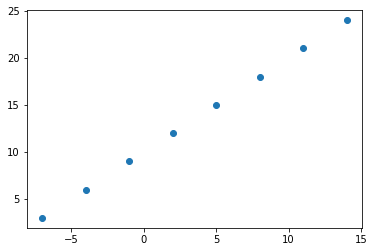

In [ ]:
plt.scatter(X,y)

In [ ]:
X = np.arange(-100, 100, 4)
X
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [ ]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

# or train_test_split

(40, 10)

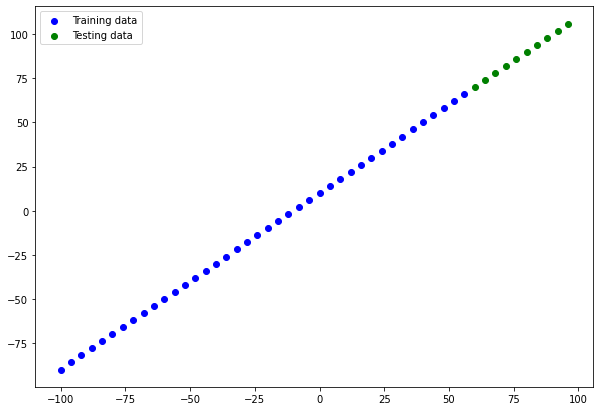

In [ ]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

In [ ]:
# Lets have a look at how to build a NN for our data
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100,activation=None),
  tf.keras.layers.Dense(1)
])
model.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.mae,metrics=['mae'])
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 50.6824 - mae: 50.6824
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 48.0928 - mae: 48.0928
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 46.0334 - mae: 46.0334
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 43.6137 - mae: 43.6137
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 41.8975 - mae: 41.8975
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 40.3373 - mae: 40.3373
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 37.7950 - mae: 37.7950
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 34.3319 - mae: 34.3319
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 32.4947 - mae: 32.4947
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 31.2543 - mae: 31.2543
Epoch 11/100
2/2 [==============================] - 0s 5ms/

In [ ]:
y_preds = model.predict(X_test)

In [ ]:

# Lets create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)
# 1. Create a model (Same)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(62500,input_shape=[1],name='input_layer'),
  tf.keras.layers.Dense(1,name='output_layer')
],name='model_1')

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(),metrics=['mae'])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 62500)             125000    
_________________________________________________________________
output_layer (Dense)         (None, 1)                 62501     
Total params: 187,501
Trainable params: 187,501
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model. how many nerous * 2
* Trainable parameter - these are the params (patterns) the model can update as it trains.
* Non trainable params - these params arent updated durning traning (this changes when you get a pre trained model using tranfer learning)

In [ ]:
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [ ]:
# Dense = fully connect layer

In [ ]:
model.fit(X_train,y_train,epochs=250)

Epoch 1/250
2/2 [==============================] - 0s 8ms/step - loss: 38.1939 - mae: 38.1939
Epoch 2/250
2/2 [==============================] - 0s 7ms/step - loss: 16.2855 - mae: 16.2855
Epoch 3/250
2/2 [==============================] - 0s 7ms/step - loss: 17.1991 - mae: 17.1991
Epoch 4/250
2/2 [==============================] - 0s 7ms/step - loss: 7.7149 - mae: 7.7149
Epoch 5/250
2/2 [==============================] - 0s 8ms/step - loss: 12.3793 - mae: 12.3793
Epoch 6/250
2/2 [==============================] - 0s 7ms/step - loss: 7.3930 - mae: 7.3930
Epoch 7/250
2/2 [==============================] - 0s 8ms/step - loss: 9.8685 - mae: 9.8685
Epoch 8/250
2/2 [==============================] - 0s 8ms/step - loss: 9.1552 - mae: 9.1552
Epoch 9/250
2/2 [==============================] - 0s 8ms/step - loss: 6.3977 - mae: 6.3977
Epoch 10/250
2/2 [==============================] - 0s 7ms/step - loss: 10.0373 - mae: 10.0373
Epoch 11/250
2/2 [==============================] - 0s 7ms/step - los

In [ ]:
model.predict(X_test)

array([[65.57892 ],
       [69.319084],
       [73.05944 ],
       [76.79967 ],
       [80.53989 ],
       [84.28013 ],
       [88.0204  ],
       [91.760704],
       [95.50095 ],
       [99.24122 ]], dtype=float32)

In [ ]:
y_test

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [ ]:
np.round(model.predict(X_test))

array([[66.],
       [69.],
       [73.],
       [77.],
       [81.],
       [84.],
       [88.],
       [92.],
       [96.],
       [99.]], dtype=float32)

In [ ]:
np.round(model.predict(X_test)) == np.array([y_test])

array([[False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False]])

In [ ]:
np.round(model.predict(X_test))

array([[66.],
       [69.],
       [73.],
       [77.],
       [81.],
       [84.],
       [88.],
       [92.],
       [96.],
       [99.]], dtype=float32)

In [ ]:
np.array([y_test])

array([[ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]])

In [ ]:
y_test

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [ ]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 62500)             125000    
_________________________________________________________________
output_layer (Dense)         (None, 1)                 62501     
Total params: 187,501
Trainable params: 187,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.utils import plot_model

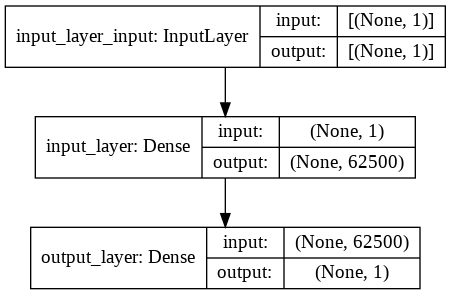

In [ ]:
plot_model(model=model,show_shapes=True)

### Visuallizing our models predictions

To visualize predictions, its good to idea to plot them against the ground truth labels

often like `y_test` or `y_true` VS `y_pred` (the real data VS the predictions)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_test

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [ ]:
y_pred

array([[65.57892 ],
       [69.319084],
       [73.05944 ],
       [76.79967 ],
       [80.53989 ],
       [84.28013 ],
       [88.0204  ],
       [91.760704],
       [95.50095 ],
       [99.24122 ]], dtype=float32)

In [ ]:
# Lets create your plotting funtion
def plot_preds(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,preds=y_pred):
  """
  Plots training data and test data and compares data to the groud truth labels
  """
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data,train_labels,c='b',label='Training Data')
  # Plot testing data in green
  plt.scatter(test_data,test_labels,c='g',label='Testing Data')
  # Plot models preds in red
  plt.scatter(test_data,preds,c='r',label='Preds')
  # Show the legend
  plt.legend();

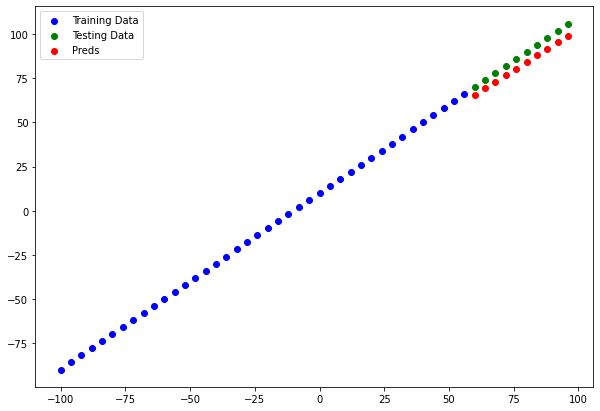

In [ ]:
plot_preds(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,preds=y_pred)

## Evaluating our models predictions with regression evaluation metrics

In [ ]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(tf.squeeze(y_test),
                                        tf.squeeze(y_pred))
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(tf.squeeze(y_test),
                                        tf.squeeze(y_pred))

In [ ]:

# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 16.4124 - mae: 16.4124
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 11.0829 - mae: 11.0829
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 11.1242 - mae: 11.1242
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 8.6945 - mae: 8.6945
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 9.8003 - mae: 9.8003
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 9.5263 - mae: 9.5263
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 8.4102 - mae: 8.4102
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 9.1449 - mae: 9.1449
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 19.4932 - mae: 19.4932
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 9.6061 - mae: 9.6061
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - loss:

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 16.4124 - mae: 16.4124
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 11.0829 - mae: 11.0829
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 11.1242 - mae: 11.1242
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 8.6945 - mae: 8.6945
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 9.8003 - mae: 9.8003
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 9.5263 - mae: 9.5263
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 8.4102 - mae: 8.4102
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 9.1449 - mae: 9.1449
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 19.4932 - mae: 19.4932
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 9.6061 - mae: 9.6061
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - loss:

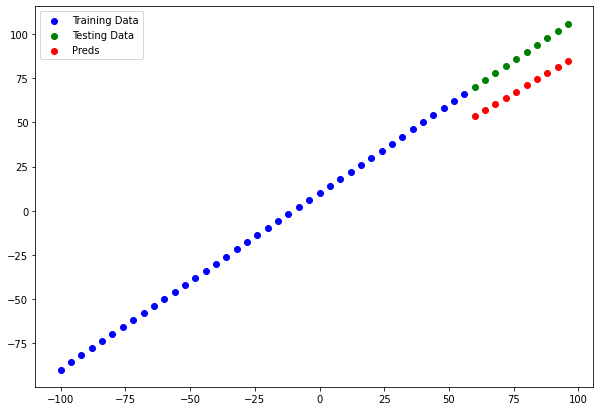

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_preds(preds=y_preds_1)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(X_train, y_train, epochs=100, verbose=0) # set verbose to 0 for less output

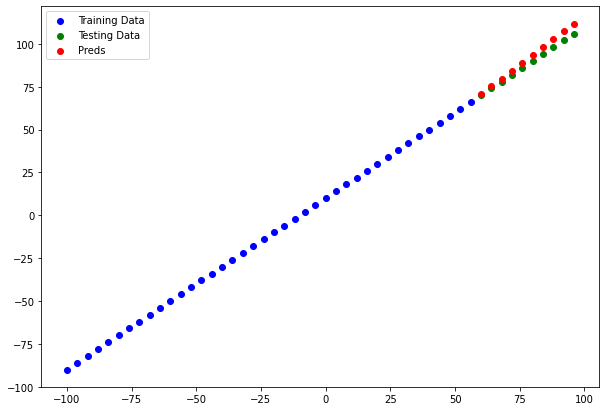

In [ ]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_preds(preds=y_preds_2)

In [ ]:

# Set random seed
tf.random.set_seed(42)

# Replicate model_2
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_3.fit(X_train, y_train, epochs=500, verbose=0) # set verbose to 0 for less output

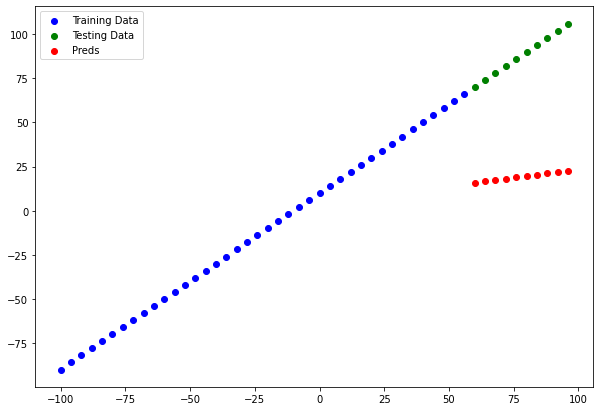

In [ ]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_preds(preds=y_preds_3)

In [ ]:
y_pred

array([[65.57892 ],
       [69.319084],
       [73.05944 ],
       [76.79967 ],
       [80.53989 ],
       [84.28013 ],
       [88.0204  ],
       [91.760704],
       [95.50095 ],
       [99.24122 ]], dtype=float32)

In [ ]:
y_preds_1

array([[53.57109 ],
       [57.05633 ],
       [60.541573],
       [64.02681 ],
       [67.512054],
       [70.99729 ],
       [74.48254 ],
       [77.96777 ],
       [81.45301 ],
       [84.938255]], dtype=float32)

In [ ]:
y_preds_2

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [ ]:
y_preds_3

array([[15.854742],
       [16.617329],
       [17.379915],
       [18.142504],
       [18.905092],
       [19.667677],
       [20.430264],
       [21.192854],
       [21.95544 ],
       [22.718027]], dtype=float32)

In [ ]:
mae_1 = mae(y_test,model_1.predict(X_test))
mse_1 = mse(y_test,model_1.predict(X_test))

mae_2 = mae(y_test,model_2.predict(X_test))
mse_2 = mse(y_test,model_2.predict(X_test))

mae_3 = mae(y_test,model_3.predict(X_test))
mse_3 = mse(y_test,model_3.predict(X_test))

In [ ]:
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mae_3.numpy()]]
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143
2,model_3,68.713615,68.713615


Tracking your experiments
One really good habit to get into is tracking your modelling experiments to see which perform better than others.

We've done a simple version of this above (keeping the results in different variables).

📖 Resource: But as you build more models, you'll want to look into using tools such as:

TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this later).
Weights & Biases - a tool for tracking all kinds of machine learning experiments (the good news for Weights & Biases is it plugs into TensorBoard).

## Saving a model

Saving our model allows us to use them outside of Google Colab, and use them in a web app or a mobile app.

In [ ]:
# Saved Model Format
# HDF5 Format

In [ ]:
model_2.save('2-layers--100-epochs')

INFO:tensorflow:Assets written to: 2-layers--100-epochs/assets


In [ ]:
model_2.save('2-layers--100-epochs.h5')

In [ ]:
tf.keras.models.save_model(model_2,'./model.h5') # I think this is better

In [ ]:
# .h5 way is the best

In [ ]:
model_2_loaded = tf.keras.models.load_model('2-layers--100-epochs.h5')

In [ ]:
model_2_loaded.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2_loaded.evaluate(X_test,y_test)

1/1 [==============================] - 0s 131ms/step - loss: 3.1969 - mae: 3.1969


[3.1969451904296875, 3.1969451904296875]

In [ ]:
model_2.evaluate(X_test,y_test)

1/1 [==============================] - 0s 96ms/step - loss: 3.1969 - mae: 3.1969


[3.1969451904296875, 3.1969451904296875]

In [ ]:
model_2.evaluate(X_test,y_test)

1/1 [==============================] - 0s 17ms/step - loss: 3.1969 - mae: 3.1969


[3.1969451904296875, 3.1969451904296875]

In [ ]:
model_2_loaded.evaluate(X_test,y_test)

1/1 [==============================] - 0s 16ms/step - loss: 3.1969 - mae: 3.1969


[3.1969451904296875, 3.1969451904296875]

In [ ]:
# Download Files (Code)
from google.colab import files
files.download('/content/2-layers--100-epochs.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Google Colab to Google Drive
!cp /content/2-layers--100-epochs.h5 /content/drive/MyDrive/Colab\ Notebooks/models/01

# A larger Example

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# Read in the insurance dataset
insurace = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [ ]:
insurace

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
len(insurace)

1338

In [ ]:
insurace.dropna(inplace=True)

In [ ]:
len(insurace)

1338

In [ ]:
def object_to_int(data,column):
  index = -1
  all_info = []
  info_dict = {}
  for info in data[column]:
    if info not in info_dict:
      index = index + 1
      info_dict[info] = index
  for info in data[column]:
    all_info.append(info_dict[info])
  return (index,all_info,info_dict)

In [ ]:
insurace.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurace.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
insurace['bmi'] = insurace['bmi'].astype(int)
insurace['charges'] = insurace['charges'].astype(int)

In [ ]:
insurace.dtypes

age          int64
sex         object
bmi          int64
children     int64
smoker      object
region      object
charges      int64
dtype: object

In [ ]:
sex_info = object_to_int(insurace,'sex')
insurace['sex'] = sex_info[1]
smoker_info = object_to_int(insurace,'smoker')
insurace['smoker'] = smoker_info[1]
region_info = object_to_int(insurace,'region')
insurace['region'] = region_info[1]
# or pd.get_dummies(insurace)

In [ ]:
insurace.dtypes

age         int64
sex         int64
bmi         int64
children    int64
smoker      int64
region      int64
charges     int64
dtype: object

In [ ]:
insurace.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27,0,0,0,16884
1,18,1,33,1,1,1,1725
2,28,1,33,3,1,1,4449
3,33,1,22,0,1,2,21984
4,32,1,28,0,1,2,3866


In [ ]:
insurace['region'].value_counts()

1    364
2    325
0    325
3    324
Name: region, dtype: int64

In [ ]:
insurace['smoker'].value_counts()

1    1064
0     274
Name: smoker, dtype: int64

In [ ]:
insurace['sex'].value_counts()

1    676
0    662
Name: sex, dtype: int64

In [ ]:
insurace.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27,0,0,0,16884
1,18,1,33,1,1,1,1725
2,28,1,33,3,1,1,4449
3,33,1,22,0,1,2,21984
4,32,1,28,0,1,2,3866


In [ ]:
X = insurace.drop('charges',axis=1)
y = insurace['charges']

In [ ]:
from sklearn.metrics import *
from sklearn.model_selection import *

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [ ]:
len(X_train)

1003

In [ ]:
len(X_test)

335

In [ ]:
!pip3 install wandb

In [ ]:
import shutil
try:
  shutil.rmtree('/content/wandb/')
except:
  shutil.rmtree('/content/wandb')

FileNotFoundError: ignored

In [ ]:
# import wandb
# from wandb.keras import WandbCallback
# wandb.init(config={"hyper": "parameter"},name='500-20000-Final-1')#,project='test', entity='ranuga-d') # Sigmoid linear softmax Swish ReLU Tanh
# model = tf.keras.Sequential([
#   tf.keras.layers.Dense(1),
#   tf.keras.layers.Dense(4000,activation='swish'),
#   tf.keras.layers.Dense(4000,activation='swish'),
#   tf.keras.layers.Dense(4000,activation='swish'),
#   tf.keras.layers.Dense(4000,activation='swish'),
#   tf.keras.layers.Dense(4000,activation='swish'),
#   tf.keras.layers.Dense(1,activation='softmax'),
#   tf.keras.layers.Dense(1),
# ])
# model.compile(loss=tf.keras.losses.mae,metrics=['mae'],optimizer=tf.keras.optimizers.Adam())
# model.fit(X_train,y_train,validation_data=(X_test,y_test),callbacks=[WandbCallback(log_weights=True),tf.keras.callbacks.EarlyStopping(patience=5),tf.keras.callbacks.ReduceLROnPlateau(monitor='val_mae',factor=0.2,patience=2,min_lr=0.001,verbose=2)],epochs=500)
# model.save('/content/drive/MyDrive/Colab Notebooks/models/500-big-dog-model.h5')
# wandb.finish()

In [ ]:
# Layers = 5
# Epochs = 500 or 750
# learning rate = 0.001
# total neurons = 20000
# activation type = Swish

In [ ]:
# model.save('/content/drive/MyDrive/Colab Notebooks/models/750-big-dog-model.h5')

In [ ]:
# Modelling Course
tf.random.set_seed(42)

# Create a model
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])
# Compile
insurance_model.compile(loss=tf.keras.losses.mae,metrics=['mae'],optimizer=tf.keras.optimizers.Adam())
# Fit
insurance_model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 15ms/step - loss: 13565.2972 - mae: 13565.2972 - val_loss: 14268.9600 - val_mae: 14268.9600
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 12563.3890 - mae: 12563.3890 - val_loss: 14256.4385 - val_mae: 14256.4385
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 13004.8827 - mae: 13004.8827 - val_loss: 14242.6602 - val_mae: 14242.6602
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 13103.6071 - mae: 13103.6071 - val_loss: 14227.1387 - val_mae: 14227.1387
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 12823.0183 - mae: 12823.0183 - val_loss: 14209.2041 - val_mae: 14209.2041
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 12415.4193 - mae: 12415.4193 - val_loss: 14188.5713 - val_mae: 14188.5713
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 12708.9947 - mae: 12708.9947 - val_loss: 141

In [ ]:
insurance_model.evaluate(X_test,y_test)

11/11 [==============================] - 0s 1ms/step - loss: 8230.1973 - mae: 8230.1973


[8230.197265625, 8230.197265625]

In [ ]:
y_test.median(),y_test.mean()

(10043.0, 14278.898507462687)

In [ ]:
y_pred = insurance_model.predict(X_test)

In [ ]:
len(y_pred)

335

In [ ]:
len(X_test)

335

In [ ]:
len(y_pred[0])

1

Right now the model is not the best kets try and improve our model

To (try) to improve our model, we'll run 2 experiments.

1. Add an extra layer with more hidden unis
2. Train for longer

In [ ]:
tf.random.set_seed(42)

# Create the model
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])
insurance_model_2.compile(loss=tf.keras.losses.mae,metrics=['mae'],optimizer=tf.keras.optimizers.Adam())
insurance_model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 13522.8184 - mae: 13522.8184
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 12407.5517 - mae: 12407.5517
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 12609.4882 - mae: 12609.4882
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 12240.1730 - mae: 12240.1730
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 11117.4421 - mae: 11117.4421
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 9498.6769 - mae: 9498.6769
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 8542.4860 - mae: 8542.4860
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 7576.1854 - mae: 7576.1854
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 7225.3852 - mae: 7225.3852
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 7299.1414 - mae:

In [ ]:
insurance_model_2.evaluate(X_test,y_test)

11/11 [==============================] - 0s 1ms/step - loss: 7120.9038 - mae: 7120.9038


[7120.90380859375, 7120.90380859375]

In [ ]:
y_test.mean()

14278.898507462687

In [ ]:
np.array(insurance_model_2.predict(X_test)).mean()

7632.0254

In [ ]:
tf.random.set_seed(42)

# Create the model
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1),
])
insurance_model_3.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(),metrics=['mae'])
history = insurance_model_3.fit(X_train,y_train,epochs=2500,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='mae',patience=25,verbose=2),tf.keras.callbacks.ReduceLROnPlateau(monitor='mae',factor=0.2,patience=2,min_lr=0.001,verbose=2)])

Epoch 1/2500
32/32 [==============================] - 0s 1ms/step - loss: 13522.8184 - mae: 13522.8184
Epoch 2/2500
32/32 [==============================] - 0s 1ms/step - loss: 12407.5517 - mae: 12407.5517
Epoch 3/2500
32/32 [==============================] - 0s 1ms/step - loss: 12609.4882 - mae: 12609.4882
Epoch 4/2500
32/32 [==============================] - 0s 1ms/step - loss: 12240.1730 - mae: 12240.1730
Epoch 5/2500
32/32 [==============================] - 0s 1ms/step - loss: 11117.4421 - mae: 11117.4421
Epoch 6/2500
32/32 [==============================] - 0s 1ms/step - loss: 9498.6769 - mae: 9498.6769
Epoch 7/2500
32/32 [==============================] - 0s 1ms/step - loss: 8542.4860 - mae: 8542.4860
Epoch 8/2500
32/32 [==============================] - 0s 1ms/step - loss: 7576.1854 - mae: 7576.1854
Epoch 9/2500
32/32 [==============================] - 0s 1ms/step - loss: 7225.3852 - mae: 7225.3852
Epoch 10/2500
32/32 [==============================] - 0s 1ms/step - loss: 7299.1

KeyboardInterrupt: ignored

In [ ]:
insurance_model_3.evaluate(X_test,y_test)

In [ ]:
insurance_model_2.evaluate(X_test,y_test)

In [ ]:
insurance_model.evaluate(X_test,y_test)

In [ ]:
# Plot history (also know as loss curve or a training curve)

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

> ? How long should you train for ? 

It depends... It depends on the problem. alot of people asked this question. so tensorflow has gave a solution EarlyStoppingCallbacks, which is a tensorflow componet you can add to your model to stop training once it stop training.

In [ ]:
!nvidia-smi

## Preproccessing data (normalization and standardisation)

In terms of scaling values, NN tend to prefer normalization.

Try both and find what is better.



In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Read in the insurance dataset
insurace = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [2]:
insurace.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# To preapre our data, we can borrow some classes from Sklearn

In [4]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
# Create a coloum transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age','bmi','children']), # turn all values in this coloum between 0 and 1
    (OneHotEncoder(handle_unknown='ignore'), ['sex','smoker','region'])
)

# Create X and y
X = insurace.drop('charges',axis=1)
y = insurace['charges']

# Split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

# Fit the coloum transformer to training data
ct.fit(X_train)

# Transform training and data with (Min max scaler) and One hot encoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [5]:
X_train_normal[0]

array([0.13043478, 0.20702179, 0.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [6]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [7]:
# Shape of the data
X_train.shape,X_train_normal.shape

((1003, 6), (1003, 11))

In [8]:
# test_data = np.array([19,'male',30,0,'no','southwest'])
# ct.transform(test_data)

In [9]:
np.array(X_train.loc[0])

array([19, 'female', 27.9, 0, 'yes', 'southwest'], dtype=object)

In [10]:
# test_data

In [11]:
ct.transform(X_train)

array([[0.13043478, 0.20702179, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.2173913 , 0.28383105, 0.4       , ..., 0.        , 1.        ,
        0.        ],
       [0.7173913 , 0.63868711, 0.2       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [12]:
test_data = X_train.iloc[0]

In [13]:
# ct.transform([test_data])

In [14]:
np.array(test_data)

array([24, 'male', 23.655, 0, 'no', 'northwest'], dtype=object)

In [15]:
X_train

,age,sex,bmi,children,smoker,region
693,24,male,23.655,0,no,northwest
1297,28,female,26.510,2,no,southeast
634,51,male,39.700,1,no,southwest
1022,47,male,36.080,1,yes,southeast
178,46,female,28.900,2,no,southwest
...,...,...,...,...,...,...
1095,18,female,31.350,4,no,northeast
1130,39,female,23.870,5,no,southeast
1294,58,male,25.175,0,no,northeast
860,37,female,47.600,2,yes,southwest


In [16]:
X_train_normal

array([[0.13043478, 0.20702179, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.2173913 , 0.28383105, 0.4       , ..., 0.        , 1.        ,
        0.        ],
       [0.7173913 , 0.63868711, 0.2       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [17]:
np.array(X_train.iloc[0])

array([24, 'male', 23.655, 0, 'no', 'northwest'], dtype=object)

In [18]:
test_data = pd.DataFrame(np.array([[24, 'male', 23.655, 0, 'no', 'northwest']]),columns=['age','sex','bmi','children','smoker','region'])

In [19]:
test_data

,age,sex,bmi,children,smoker,region
0,24,male,23.655,0,no,northwest


In [20]:
test_data

,age,sex,bmi,children,smoker,region
0,24,male,23.655,0,no,northwest


In [21]:
ct.transform(test_data)

array([[0.13043478, 0.20702179, 0.        , 0.        , 1.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]])

In [22]:
# Beautiful! our data is normalized and one hot encoded.

In [24]:
!pip install wandb

     |████████████████████████████████| 2.0MB 5.4MB/s 
     |████████████████████████████████| 163kB 22.7MB/s 
     |████████████████████████████████| 102kB 8.7MB/s 
     |████████████████████████████████| 133kB 24.2MB/s 
     |████████████████████████████████| 71kB 7.8MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-cp37-none-any.whl size=8786 sha256=8112ebdf8deea0706124472afee02df39f6c62969f20e7474456da5b56d7b13d
  Stored in directory: /root/.cache/pip/wheels/0b/04/79/c3b0c3a0266a3cb4376da31e5bfe8bba0c489246968a68e843
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp37-none-any.whl size=6489 sha256=0a2834a32ce2c28c6e49aa8f692821e4a34d5a366b941f88afd1f2a5852546a0
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
Successfully built pathtools subprocess32


In [25]:
import wandb
from wandb.keras import WandbCallback
wandb.init(config={"hyper": "parameter"},name='25000')#,project='test', entity='ranuga-d') # Sigmoid linear softmax Swish ReLU Tanh
model = tf.keras.Sequential([
  tf.keras.layers.Dense(25000,activation='swish'),
  tf.keras.layers.Dense(1),
])
model.compile(loss=tf.keras.losses.mae,metrics=['mae'],optimizer=tf.keras.optimizers.Adam(lr=1))
model.fit(X_train_normal,y_train,validation_data=(ct.transform(X_test),y_test),callbacks=[WandbCallback(log_weights=True),tf.keras.callbacks.EarlyStopping(patience=25)],epochs=250)
model.save('/content/drive/MyDrive/Colab Notebooks/models/750-big-dog-model-final-v2.h5')

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch 1/250
32/32 [==============================] - 1s 23ms/step - loss: 20527.3179 - mae: 20527.3179 - val_loss: 4272.8223 - val_mae: 4272.8223
Epoch 2/250
32/32 [==============================] - 0s 15ms/step - loss: 4182.4968 - mae: 4182.4968 - val_loss: 3416.1526 - val_mae: 3416.1526
Epoch 3/250
32/32 [==============================] - 1s 16ms/step - loss: 3435.7954 - mae: 3435.7954 - val_loss: 3341.2473 - val_mae: 3341.2473
Epoch 4/250
32/32 [==============================] - 0s 14ms/step - loss: 3306.2603 - mae: 3306.2603 - val_loss: 2790.3530 - val_mae: 2790.3530
Epoch 5/250
32/32 [==============================] - 1s 16ms/step - loss: 2758.3596 - mae: 2758.3596 - val_loss: 3070.3882 - val_mae: 3070.3882
Epoch 6/250
32/32 [==============================] - 0s 14ms/step - loss: 3134.2926 - mae: 3134.2926 - val_loss: 2495.0291 - val_mae: 2495.0291
Epoch 7/250
32/32 [==============================] - 1s 16ms/step - loss: 2265.9728 - mae: 2265.9728 - val_loss: 2052.7085 - val_mae: 

In [30]:
# Build a NN model to fit on our normalized data (Course)
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])
model.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.mae,metrics=['mae','mse'])
model.fit(X_train_normal,y_train,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 12969.9415 - mae: 12969.9415 - mse: 303155941.3333
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 12810.3229 - mae: 12810.3229 - mse: 302622418.4242
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 13265.1277 - mae: 13265.1277 - mse: 324043304.7273
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 13134.2500 - mae: 13134.2500 - mse: 320685056.0000
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 12618.8142 - mae: 12618.8142 - mse: 292637273.2121
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 13384.1509 - mae: 13384.1509 - mse: 329437398.3030
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 12725.3492 - mae: 12725.3492 - mse: 299999660.1212
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 12770.7115 - mae: 12770.7115 - mse: 309191887.5152
Epoch 9/

In [33]:
# Evluate the model
model.evaluate(X_test_normal,y_test)

11/11 [==============================] - 0s 2ms/step - loss: 3627.7627 - mae: 3627.7627 - mse: 46283244.0000


[3627.7626953125, 3627.7626953125, 46283244.0]